In [8]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
data = pd.read_csv('SAheart.data', sep=',', index_col=0)
data.drop_na()
le=LabelEncoder()
data['famhist']=le.fit_transform(data['famhist'])
data.head()

AttributeError: 'DataFrame' object has no attribute 'drop_na'

In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,)

In [17]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
print(x_train.shape)
print(x_test.shape)


(369, 9)
(93, 9)


In [26]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
       # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16

In [33]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(x),
                       kernel_regularizer=regularizers.l2(0.05),
                       units=hidden_units,
                       activation=activation,  input_shape=(9,) ))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])


Epoch 1/2
24/24 [==============================] - 0s 1ms/step - loss: 1.2131 - accuracy: 0.5203
Epoch 2/2
3/3 [==============================] - 0s 3ms/step - loss: 1.1054 - accuracy: 0.6344
Training accuracy: 0.6585366129875183
Testing accuracy: 0.6344085931777954


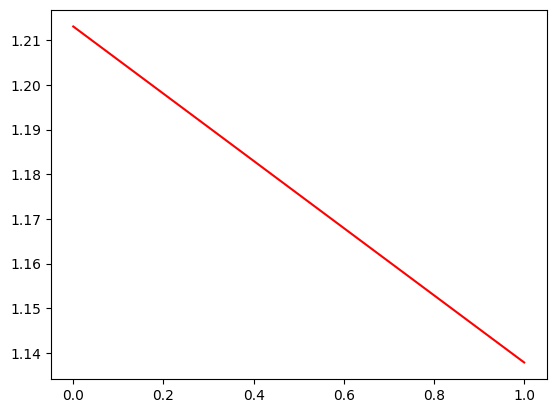

In [34]:
# train the parameters
history = model.fit(x_train, y_train, epochs=2, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### RUN IT AGAIN! ###

In [31]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [32]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:06<00:00,  2.97it/s]

Avgerage Training Accuracy: 0.6585366129875183
Avgerage Testing Accuracy: 0.6344085931777954


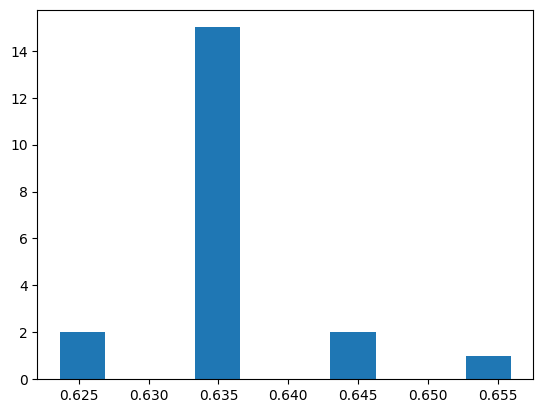

In [25]:
plt.hist(test_accs)
plt.show()